In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [3]:
import pandas as pd
df = pd.read_csv('Dataset .csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df.info()
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

TASK 1:Restaurant Ratings

Q1. Distribution of Aggregate Ratings

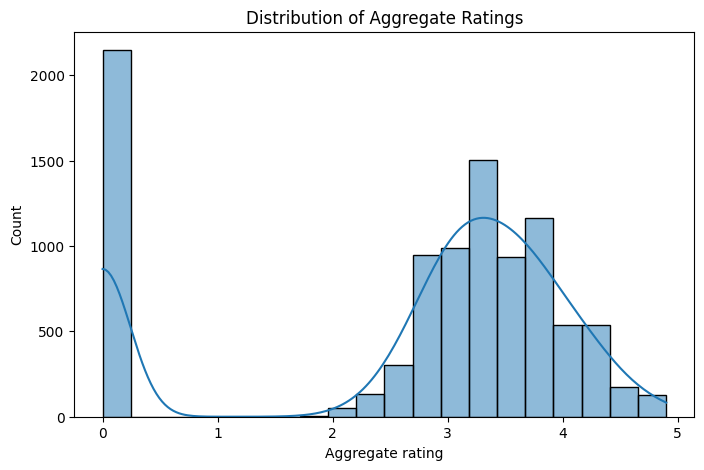

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Aggregate Ratings")
plt.show()

RATING RANGE

In [6]:
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=[0,1,2,3,4,5])
df['Rating Range'].value_counts()

Rating Range
(3, 4]    4388
(2, 3]    1891
(4, 5]    1114
(1, 2]      10
(0, 1]       0
Name: count, dtype: int64

Q2. Average Number of Votes

In [7]:
df['Votes'].mean()

np.float64(156.909747670401)

TASK 2:Cuisine Combination

Q1. Most Common Cuisine Combinations

In [8]:
df['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Q2. Cuisine vs Average Rating

In [9]:
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64

TASK 3 Geographic Analysis

Q1.Plot Restaurants on Map

In [10]:
import folium

# Create base map
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add points
for i in range(len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=2
    ).add_to(map)

map

Q2. Identify Clusters

In [13]:
from sklearn.cluster import KMeans

coords = df[['Latitude','Longitude']].dropna()

kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)
df.loc[coords.index, 'Cluster'] = kmeans.labels_

TASK 4:Restaurant Chains

Q1. Identify Restaurant Chains

In [14]:
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1]
chains.head(10)

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

Q2. Analyze Ratings & Popularity of Chains

In [15]:
df[df['Restaurant Name'].isin(chains.index)] \
  .groupby('Restaurant Name') \
  .agg({'Aggregate rating':'mean','Votes':'mean'}) \
  .sort_values(by='Aggregate rating', ascending=False) \
  .head(10)

Aggregate rating   Votes
Restaurant Name                                    
Talaga Sampireun                      4.900  1838.0
Silantro Fil-Mex                      4.850   682.0
AB's Absolute Barbecues               4.850  1575.5
AB's - Absolute Barbecues             4.825  3350.0
Naturals Ice Cream                    4.800  1547.0
Gymkhana                              4.700   164.0
The Cheesecake Factory                4.650  1505.0
Garota de Ipanema                     4.600    29.5
Dishoom                               4.600   634.5
Chili's                               4.580  1631.2